In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.0001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=d_sigmoid, rfn=None))

In [4]:
# optimizer
opt = 'sgd'

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = opt, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 10000
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

 	1.3259101938978535
itr 9607
Iteration 9607/10000: 	1.3259086252372956
itr 9608
Iteration 9608/10000: 	1.3259069139712325
itr 9609
Iteration 9609/10000: 	1.3259053453106746
itr 9610
Iteration 9610/10000: 	1.3259040618611273
itr 9611
Iteration 9611/10000: 	1.3259024932005694
itr 9612
Iteration 9612/10000: 	1.3259007819345063
itr 9613
Iteration 9613/10000: 	1.3258992132739487
itr 9614
Iteration 9614/10000: 	1.325897787218896
itr 9615
Iteration 9615/10000: 	1.3258960759528329
itr 9616
Iteration 9616/10000: 	1.3258946498977804
itr 9617
Iteration 9617/10000: 	1.3258930812372225
itr 9618
Iteration 9618/10000: 	1.3258915125766648
itr 9619
Iteration 9619/10000: 	1.325889943916107
itr 9620
Iteration 9620/10000: 	1.3258882326500439
itr 9621
Iteration 9621/10000: 	1.3258869492004965
itr 9622
Iteration 9622/10000: 	1.3258852379344335
itr 9623
Iteration 9623/10000: 	1.3258836692738756
itr 9624
Iteration 9624/10000: 	1.3258821006133177
itr 9625
Iteration 9625/10000: 	1.3258806745582652
itr 9626
Ite

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

47775354117, 1.3268733514803592, 1.3268716402142962, 1.3268702141592437, 1.3268686454986858, 1.3268672194436333, 1.32686550817757, 1.3268640821225175, 1.3268623708564544, 1.326860944801402, 1.3268592335353389, 1.326857664874781, 1.326856096214223, 1.3268546701591706, 1.3268531014986127, 1.326851532838055, 1.3268499641774971, 1.3268483955169392, 1.3268468268563813, 1.3268452581958237, 1.3268435469297606, 1.3268421208747079, 1.3268405522141502, 1.3268388409480871, 1.3268372722875292, 1.3268358462324767, 1.3268342775719189, 1.3268328515168661, 1.3268314254618137, 1.3268297141957506, 1.3268281455351927, 1.3268264342691296, 1.3268250082140771, 1.3268234395535192, 1.3268217282874561, 1.3268203022324037, 1.3268185909663406, 1.3268171649112879, 1.3268155962507302, 1.3268140275901723, 1.3268124589296144, 1.3268108902690567, 1.3268093216084988, 1.326807752947941, 1.3268060416818779, 1.32680447302132, 1.3268030469662675, 1.3268014783057096, 1.326799909645152, 1.326798340984594, 1.3267967723240361

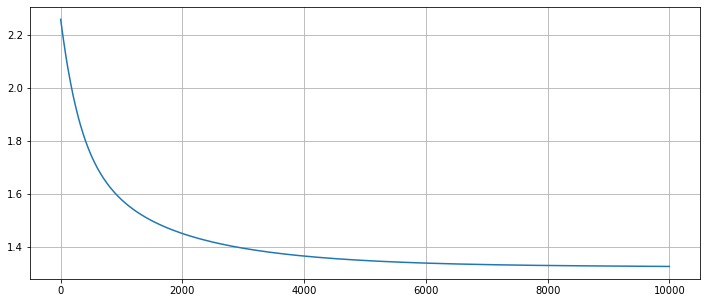

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.71624994]
 [0.00531791]
 [0.27843213]]
[1. 0. 0.] <-> [[0.6135903 ]
 [0.00183206]
 [0.38457763]]
[1. 0. 0.] <-> [[0.7406747 ]
 [0.03672897]
 [0.22259636]]
[0. 0. 1.] <-> [[0.484057 ]
 [0.0014626]
 [0.5144804]]
[1. 0. 0.] <-> [[0.71670413]
 [0.00538091]
 [0.27791503]]
[1. 0. 0.] <-> [[0.7249802 ]
 [0.03653266]
 [0.23848717]]
[0. 1. 0.] <-> [[0.74532664]
 [0.03661575]
 [0.21805759]]
[1. 0. 0.] <-> [[0.74506605]
 [0.03672767]
 [0.21820627]]
[1. 0. 0.] <-> [[0.7256407 ]
 [0.03449569]
 [0.23986354]]
[1. 0. 0.] <-> [[0.73137695]
 [0.0287435 ]
 [0.23987958]]
[1. 0. 0.] <-> [[0.7405617 ]
 [0.03673661]
 [0.22270162]]
[1. 0. 0.] <-> [[0.7321403 ]
 [0.03724412]
 [0.23061562]]
[1. 0. 0.] <-> [[0.7377135 ]
 [0.01902143]
 [0.24326514]]
[1. 0. 0.] <-> [[0.7253658 ]
 [0.03483291]
 [0.23980127]]
[1. 0. 0.] <-> [[0.7365064 ]
 [0.02198898]
 [0.24150471]]
[1. 0. 0.] <-> [[0.7304361 ]
 [0.00855832]
 [0.26100555]]
[1. 0. 0.] <-> [[0.745113  ]
 [0.03671289]
 [0.21817413]]
[1. 0. 0.] <-> [[

In [13]:
print(model)

Neuron 0: weights:
[[ 1.9369867]
 [-0.5888388]
 [ 1.1583949]
 [-1.2616273]
 [-1.4601259]]
 bias: [-0.72642789]

Neuron 1: weights:
[[ 1.8846772 ]
 [-2.0031016 ]
 [ 1.382801  ]
 [ 0.55902153]
 [ 1.9484189 ]]
 bias: [-0.73486694]

Neuron 2: weights:
[[-0.8044403 ]
 [ 2.4039087 ]
 [-0.33075842]
 [-0.7410692 ]
 [ 2.3229492 ]]
 bias: [1.61796981]

Neuron 3: weights:
[[ 2.787143  ]
 [ 1.0488764 ]
 [-2.0240998 ]
 [-0.36179793]
 [ 1.7082183 ]]
 bias: [1.38950157]

Neuron 4: weights:
[[ 2.7417848 ]
 [-0.81161386]
 [ 1.5885378 ]
 [-1.9057754 ]
 [-2.8750782 ]]
 bias: [1.34247606]

Neuron 5: weights:
[[ 1.9505199]
 [-2.2966466]
 [ 0.6271366]
 [-2.2425816]
 [-1.023015 ]]
 bias: [0.32534502]

Neuron 6: weights:
[[-0.02931814]
 [ 2.6791105 ]
 [-0.68349445]
 [ 0.292994  ]
 [ 0.015492  ]]
 bias: [-0.81827423]

Neuron 7: weights:
[[-0.46214235]
 [-1.4140997 ]
 [ 2.8059926 ]
 [ 1.7461652 ]
 [-2.345193  ]]
 bias: [-2.63794491]

$
Neuron 0: weights:
[[-1.0768372 ]
 [-0.9931633 ]
 [ 0.2540063 ]
 [ 2.081778 